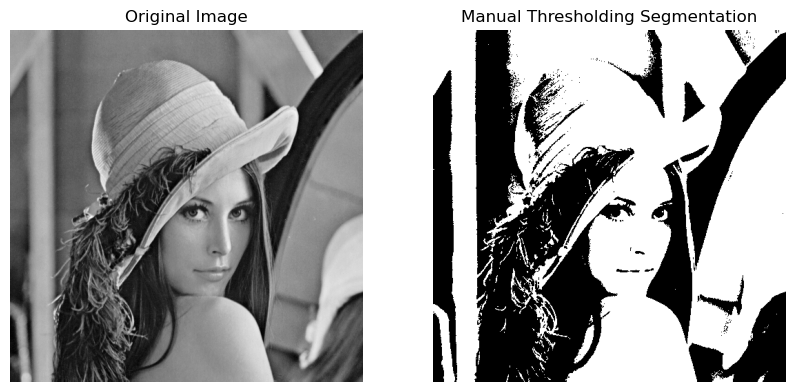

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_threshold(image, threshold_value=127):

    height, width = image.shape
    thresholded_image = np.zeros((height, width), dtype=np.uint8)

    # Apply manual thresholding
    for i in range(height):
        for j in range(width):
            thresholded_image[i, j] = 255 if image[i, j] > threshold_value else 0

    return thresholded_image

def display_results(original, segmented, method_name):

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")


    plt.subplot(1, 2, 2)
    plt.imshow(segmented, cmap="gray")
    plt.title(f"{method_name} Segmentation")
    plt.axis("off")

    plt.show()


image = cv2.imread(r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\lena.png", cv2.IMREAD_GRAYSCALE)


thresholded_image = manual_threshold(image, threshold_value=127)

display_results(image, thresholded_image, "Manual Thresholding")

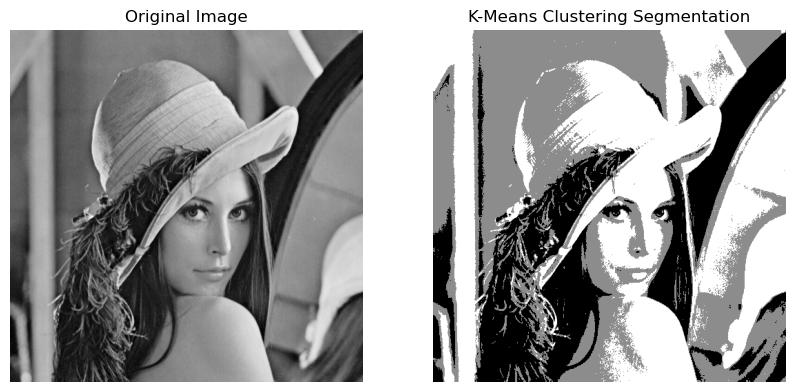

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_kmeans(image, k=3, max_iterations=10):
 
    pixels = image.reshape(-1).astype(np.float32)  

    
    np.random.seed(42)  
    centroids = np.random.choice(pixels, k, replace=False)

    for _ in range(max_iterations):
        
        distances = np.abs(pixels[:, np.newaxis] - centroids) 

      
        labels = np.argmin(distances, axis=1)

        
        new_centroids = np.array([pixels[labels == i].mean() if np.any(labels == i) else centroids[i] for i in range(k)])

        
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    
    clustered_image = np.array([centroids[label] for label in labels], dtype=np.uint8)

    return clustered_image.reshape(image.shape)




image = cv2.imread(r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\lena.png", cv2.IMREAD_GRAYSCALE)


kmeans_segmented = manual_kmeans(image, k=3, max_iterations=10)
display_results(image, kmeans_segmented, "K-Means Clustering")


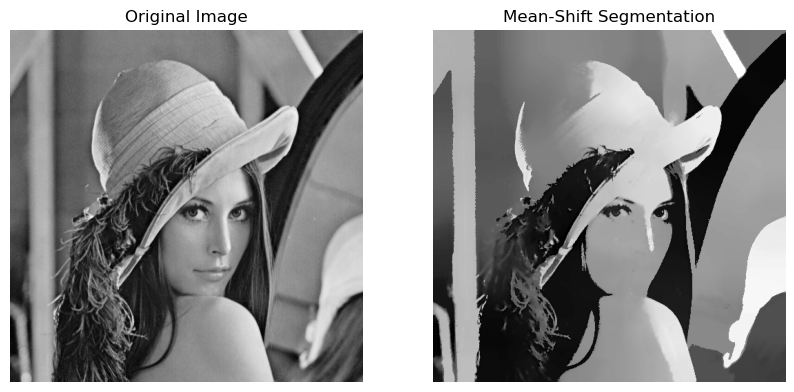

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mean_shift_segmentation(image):
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    flat_image = image.reshape((-1, 3)).astype(np.float32)
    
    bandwidth = cv2.pyrMeanShiftFiltering(image, 30, 50)
    
    
    
    return cv2.cvtColor(bandwidth, cv2.COLOR_BGR2GRAY)





image = cv2.imread(r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\lena.png", cv2.IMREAD_GRAYSCALE)

mean_shift_segmented = mean_shift_segmentation(image)
display_results(image, mean_shift_segmented, "Mean-Shift")



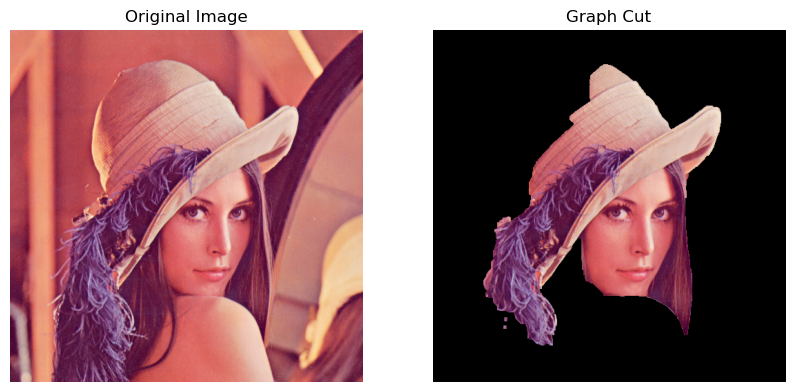

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def graph_cut_segmentation(image):
    img = image.copy()
    mask = np.zeros(img.shape[:2], np.uint8)

    bg_model = np.zeros((1, 65), np.float64)
    fg_model = np.zeros((1, 65), np.float64)

    height, width = img.shape[:2]
    rect = (int(width * 0.1), int(height * 0.1), int(width * 0.8), int(height * 0.8))

    cv2.grabCut(img, mask, rect, bg_model, fg_model, 5, cv2.GC_INIT_WITH_RECT)

    mask = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")

    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    segmented = img * mask[:, :, np.newaxis]

    return segmented

def display_results(original, segmented, title):
    # Convert images from BGR to RGB for proper display
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    segmented_rgb = cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_rgb)
    plt.title(title)
    plt.axis("off")

    plt.show()

image = cv2.imread(r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\lena.png", cv2.IMREAD_COLOR)

segmented_image = graph_cut_segmentation(image)
display_results(image, segmented_image, "Graph Cut")


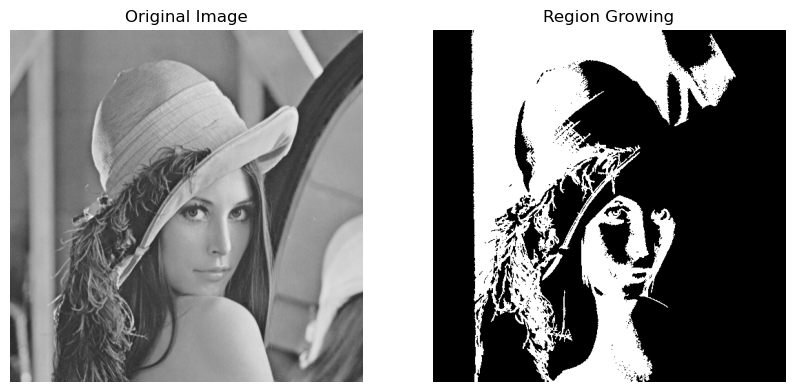

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image, seed_point, threshold=10):
    height, width = image.shape
    segmented = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)
    seed_x, seed_y = seed_point
    seed_value = image[seed_x, seed_y]

    queue = [(seed_x, seed_y)]
    while queue:
        x, y = queue.pop(0)
        if visited[x, y]:
            continue
        visited[x, y] = True
        if abs(int(image[x, y]) - int(seed_value)) <= threshold:
            segmented[x, y] = 255
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                    queue.append((nx, ny))
    return segmented



image = cv2.imread(r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\lena.png", cv2.IMREAD_GRAYSCALE)

seed_point = (image.shape[0] // 2, image.shape[1] // 2)  # Change manually if needed
region_grown = region_growing(image, seed_point, threshold=42)  # Increased threshold


display_results(image, region_grown, "Region Growing")



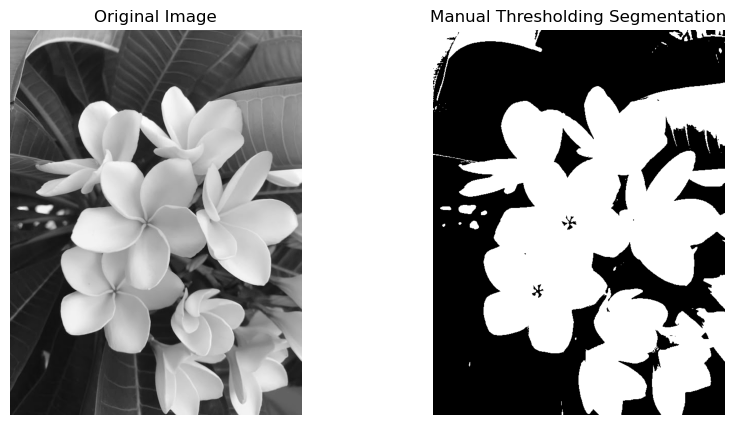

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_threshold(image, threshold_value=127):

    height, width = image.shape
    thresholded_image = np.zeros((height, width), dtype=np.uint8)

    # Apply manual thresholding
    for i in range(height):
        for j in range(width):
            thresholded_image[i, j] = 255 if image[i, j] > threshold_value else 0

    return thresholded_image

def display_results(original, segmented, method_name):

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")


    plt.subplot(1, 2, 2)
    plt.imshow(segmented, cmap="gray")
    plt.title(f"{method_name} Segmentation")
    plt.axis("off")

    plt.show()


image = cv2.imread(r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\flowers.jpeg", cv2.IMREAD_GRAYSCALE)


thresholded_image = manual_threshold(image, threshold_value=127)

display_results(image, thresholded_image, "Manual Thresholding")

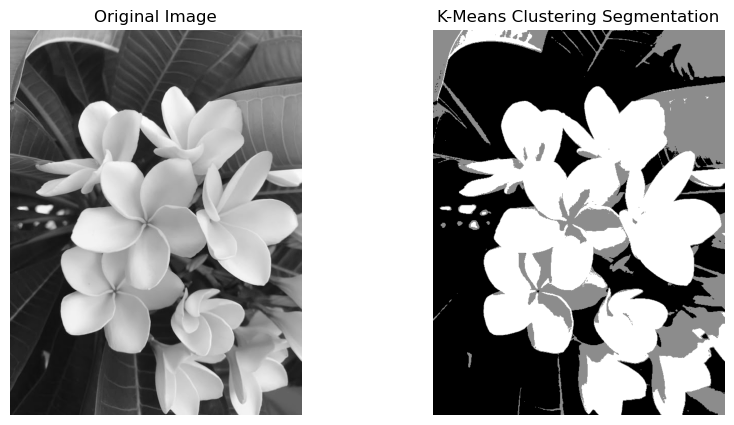

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_kmeans(image, k=3, max_iterations=10):
 
    pixels = image.reshape(-1).astype(np.float32)  

    
    np.random.seed(42)  
    centroids = np.random.choice(pixels, k, replace=False)

    for _ in range(max_iterations):
        
        distances = np.abs(pixels[:, np.newaxis] - centroids) 

      
        labels = np.argmin(distances, axis=1)

        
        new_centroids = np.array([pixels[labels == i].mean() if np.any(labels == i) else centroids[i] for i in range(k)])

        
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    
    clustered_image = np.array([centroids[label] for label in labels], dtype=np.uint8)

    return clustered_image.reshape(image.shape)




image = cv2.imread(r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\flowers.jpeg", cv2.IMREAD_GRAYSCALE)


kmeans_segmented = manual_kmeans(image, k=3, max_iterations=10)
display_results(image, kmeans_segmented, "K-Means Clustering")


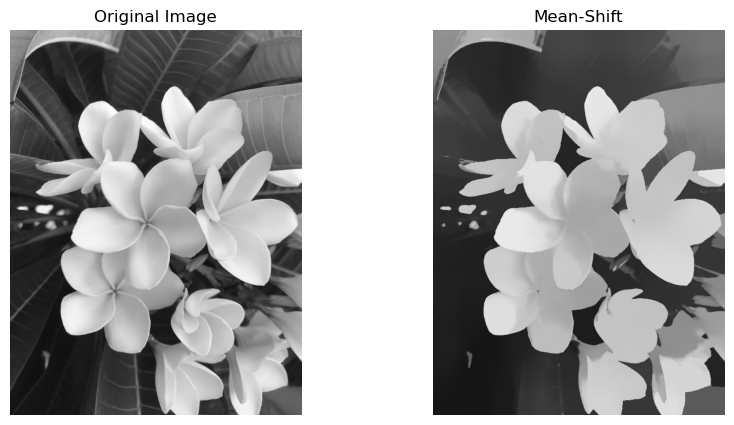

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mean_shift_segmentation(image):
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    flat_image = image.reshape((-1, 3)).astype(np.float32)
    
    bandwidth = cv2.pyrMeanShiftFiltering(image, 40, 50)
    
    return cv2.cvtColor(bandwidth, cv2.COLOR_BGR2GRAY)


image = cv2.imread(r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\flowers.jpeg", cv2.IMREAD_GRAYSCALE)

mean_shift_segmented = mean_shift_segmentation(image)
display_results(image, mean_shift_segmented, "Mean-Shift")



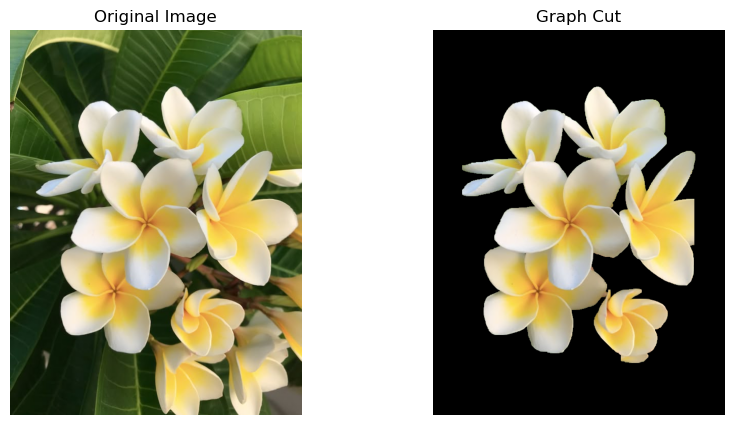

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def graph_cut_segmentation(image):
    img = image.copy()
    mask = np.zeros(img.shape[:2], np.uint8)

    bg_model = np.zeros((1, 65), np.float64)
    fg_model = np.zeros((1, 65), np.float64)

    height, width = img.shape[:2]
    rect = (int(width * 0.1), int(height * 0.1), int(width * 0.8), int(height * 0.8))

    cv2.grabCut(img, mask, rect, bg_model, fg_model, 5, cv2.GC_INIT_WITH_RECT)

    mask = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")

    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    segmented = img * mask[:, :, np.newaxis]

    return segmented

def display_results(original, segmented, title):
    # Convert images from BGR to RGB for proper display
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    segmented_rgb = cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_rgb)
    plt.title(title)
    plt.axis("off")

    plt.show()

image = cv2.imread(r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\flowers.jpeg", cv2.IMREAD_COLOR)

segmented_image = graph_cut_segmentation(image)
display_results(image, segmented_image, "Graph Cut")


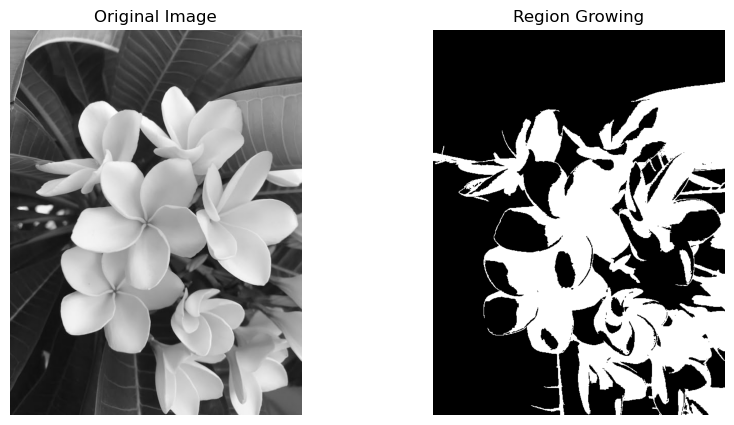

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image, seed_point, threshold=10):
    height, width = image.shape
    segmented = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)
    seed_x, seed_y = seed_point
    seed_value = image[seed_x, seed_y]

    queue = [(seed_x, seed_y)]
    while queue:
        x, y = queue.pop(0)
        if visited[x, y]:
            continue
        visited[x, y] = True
        if abs(int(image[x, y]) - int(seed_value)) <= threshold:
            segmented[x, y] = 255
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                    queue.append((nx, ny))
    return segmented



image = cv2.imread(r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\flowers.jpeg", cv2.IMREAD_GRAYSCALE)

seed_point = (image.shape[0] // 2, image.shape[1] // 2)  # Change manually if needed
region_grown = region_growing(image, seed_point, threshold=65)  # Increased threshold


display_results(image, region_grown, "Region Growing")

